In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully")


Libraries imported successfully


**Required libraries for natural language processing, machine learning, and visualization were imported**

In [11]:
df = pd.read_csv("Twitter_Data.csv",encoding="latin-1")
df.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [12]:
df.columns

Index(['clean_text', 'category'], dtype='object')

**Check Class Distribution**

In [13]:
df['category'].value_counts()


category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

*The dataset contains three sentiment classes: negative, neutral, and positive.*

**Convert Labels to Meaningful Names**

In [14]:
df['sentiment'] = df['category'].map({
    -1: 'Negative',
     0: 'Neutral',
     1: 'Positive'
})

df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,when modi promised âminimum government maxim...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [15]:
df['clean_text'].isnull().sum()

np.int64(4)

In [16]:
df['clean_text'] = df['clean_text'].fillna('')

In [17]:
df['clean_text'] = df['clean_text'].astype(str)


**Feature Engineering(TF-IDF)**

In [18]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


**Encode sentiment labels**

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment_encoded'] = encoder.fit_transform(df['sentiment'])

df[['sentiment', 'sentiment_encoded']].head()


,sentiment,sentiment_encoded
0,Negative,0
1,Neutral,1
2,Positive,2
3,Positive,2
4,Positive,2


**Redefine X and y**

In [26]:
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment_encoded']


**Train-test split**

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Train the model**

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


**Predictions & Evaluation**

In [34]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7427905264449626
              precision    recall  f1-score   support

           0       0.92      0.42      0.58      7179
           1       0.88      0.68      0.77     11034
           2       0.66      0.95      0.78     14383

    accuracy                           0.74     32596
   macro avg       0.82      0.68      0.71     32596
weighted avg       0.79      0.74      0.73     32596



**Visualization**

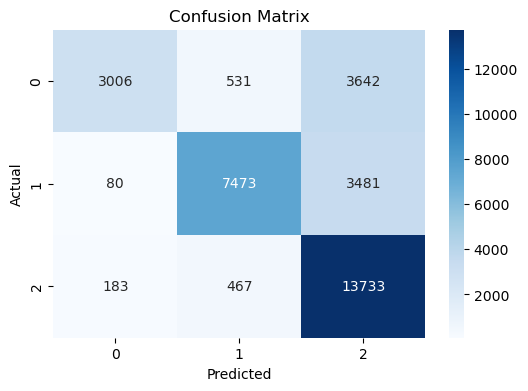

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues'
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


*Visualizations were used to interpret model performance and sentiment distribution.*

**Conclusion:**
The sentiment analysis model successfully classified text data into positive and negative sentiments using NLP techniques and machine learning. This project demonstrates the practical application of sentiment analysis in understanding public opinion and customer feedback.